In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
daily_activity = pd.read_csv("C:/GrindGraph/data/dailyActivity.csv")

# Quick peek
print(daily_activity.head())

# Info + summary
print(daily_activity.info())
print(daily_activity.describe())

# --- Visualization 1: Calories vs Steps ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=daily_activity, x="TotalSteps", y="Calories")
plt.title("Calories Burned vs Steps")
plt.show()

# --- Visualization 2: Avg Steps by Day of Week ---
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
daily_activity["DayOfWeek"] = daily_activity["ActivityDate"].dt.day_name()

avg_steps = daily_activity.groupby("DayOfWeek")["TotalSteps"].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_steps.index, y=avg_steps.values)
plt.title("Average Steps by Day of Week")
plt.xticks(rotation=45)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/GrindGraph/data/dailyActivity.csv'

In [10]:
import pandas as pd
import os

# Paths to both folders
folder1 = "C:/GrindGraph/data/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16"
folder2 = "C:/GrindGraph/data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16"

# Load daily activity datasets from both
df1 = pd.read_csv(os.path.join(folder1, "dailyActivity_merged.csv"))
df2 = pd.read_csv(os.path.join(folder2, "dailyActivity_merged.csv"))

# Merge
daily_activity = pd.concat([df1, df2], ignore_index=True)

# Convert date
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])

print(daily_activity.shape)
print(daily_activity.head())

df=daily_activity
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
df['Weekday'] = df['ActivityDate'].dt.day_name()
df['Month'] = df['ActivityDate'].dt.month_name()

print(df.info())
print(df.describe())
print(df['Weekday'].value_counts())


(1397, 15)
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-03-25       11004           7.11             7.11   
1  1503960366   2016-03-26       17609          11.55            11.55   
2  1503960366   2016-03-27       12736           8.53             8.53   
3  1503960366   2016-03-28       13231           8.93             8.93   
4  1503960366   2016-03-29       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0          

In [5]:
import os

folder1 = "C:/GrindGraph/data/mturkfitbit_export_3.12.16-4.11.16"
folder2 = "C:/GrindGraph/data/mturkfitbit_export_4.12.16-5.12.16"

print("Folder 1 files:", os.listdir(folder1))
print("Folder 2 files:", os.listdir(folder2))


Folder 1 files: ['Fitabase Data 3.12.16-4.11.16']
Folder 2 files: ['Fitabase Data 4.12.16-5.12.16']


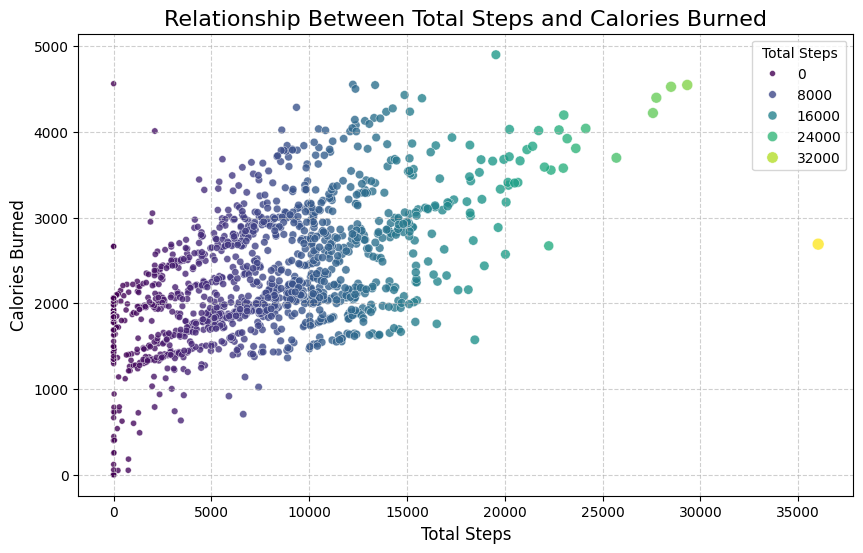

C:\Users\harsh\AppData\Local\Temp\ipykernel_13952\3129241594.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_steps_weekday.index, y=avg_steps_weekday.values, palette="rocket")


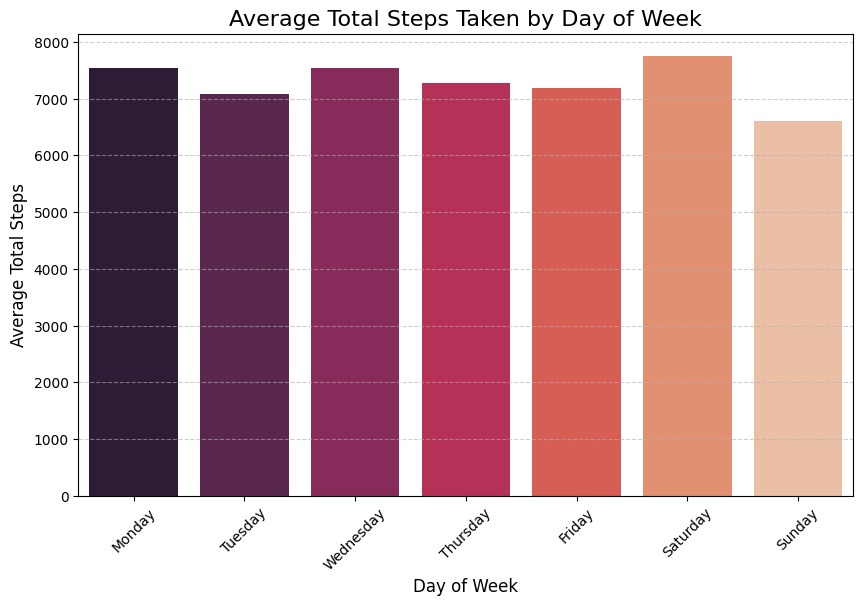

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame is named 'df' (from the previous step's merge)

# --- Visualization 1: Steps vs. Calories Burned (The Core Relationship) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x="TotalSteps", 
    y="Calories", 
    hue="TotalSteps", 
    size="TotalSteps", 
    palette="viridis", 
    alpha=0.8
)
plt.title("Relationship Between Total Steps and Calories Burned", fontsize=16)
plt.xlabel("Total Steps", fontsize=12)
plt.ylabel("Calories Burned", fontsize=12)
plt.legend(title='Total Steps')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# --- Visualization 2: Average Steps by Day of Week (Activity Habits) ---

# Aggregate data by Weekday
avg_steps_weekday = df.groupby("Weekday")["TotalSteps"].mean().reindex(
    # Order the days correctly for a bar plot
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_steps_weekday.index, y=avg_steps_weekday.values, palette="rocket")
plt.title("Average Total Steps Taken by Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average Total Steps", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [14]:
# Assuming your sleep data CSV is named 'sleepDay_merged.csv'
import pandas as pd
import os

# Define the paths (adjust file name if yours is different from 'sleepDay_merged.csv')
folder1 = "C:/GrindGraph/data/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16"
folder2 = "C:/GrindGraph/data/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16"

# 1. Load the granular minuteSleep data from both folders
df_sleep1 = pd.read_csv(os.path.join(folder1, "minuteSleep_merged.csv"))
df_sleep2 = pd.read_csv(os.path.join(folder2, "minuteSleep_merged.csv"))

# Merge the two sleep dataframes
minute_sleep_data = pd.concat([df_sleep1, df_sleep2], ignore_index=True)

# 2. Clean and format the date column
# Extract the date part and rename the column for merging
minute_sleep_data['date'] = pd.to_datetime(minute_sleep_data['date']).dt.date
minute_sleep_data.rename(columns={'date': 'ActivityDate'}, inplace=True)


# 3. Aggregate the minute data to daily totals for a Daily Sleep Summary
daily_sleep_summary = minute_sleep_data.groupby(['Id', 'ActivityDate']).agg(
    TotalSleepRecords=('logId', 'nunique'),  # Count distinct sleep records
    TotalMinutesAsleep=('value', 'sum')       # Sum all minute values (0=awake, 1=asleep)
).reset_index()

# NOTE: The "TotalTimeInBed" column is not consistently available in the minuteSleep file,
# so we will rely on TotalMinutesAsleep (Total Minutes = Time Asleep).

# Convert the 'ActivityDate' column type to match the main activity DataFrame (if needed)
daily_sleep_summary['ActivityDate'] = pd.to_datetime(daily_sleep_summary['ActivityDate'])


# 4. Merge the main activity DataFrame (df) with the new daily sleep summary
df_merged = pd.merge(df, daily_sleep_summary[['Id', 'ActivityDate', 'TotalMinutesAsleep']], 
                    on=['Id', 'ActivityDate'], 
                    how='left')

# Diagnostics
print("\nMerged DataFrame Shape (with Sleep):", df_merged.shape)
print("\nMissing Sleep Data Check:")
print(df_merged[['TotalMinutesAsleep']].isnull().sum())


Merged DataFrame Shape (with Sleep): (1397, 18)

Missing Sleep Data Check:
TotalMinutesAsleep    751
dtype: int64


C:\Users\harsh\AppData\Local\Temp\ipykernel_13952\3883669180.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


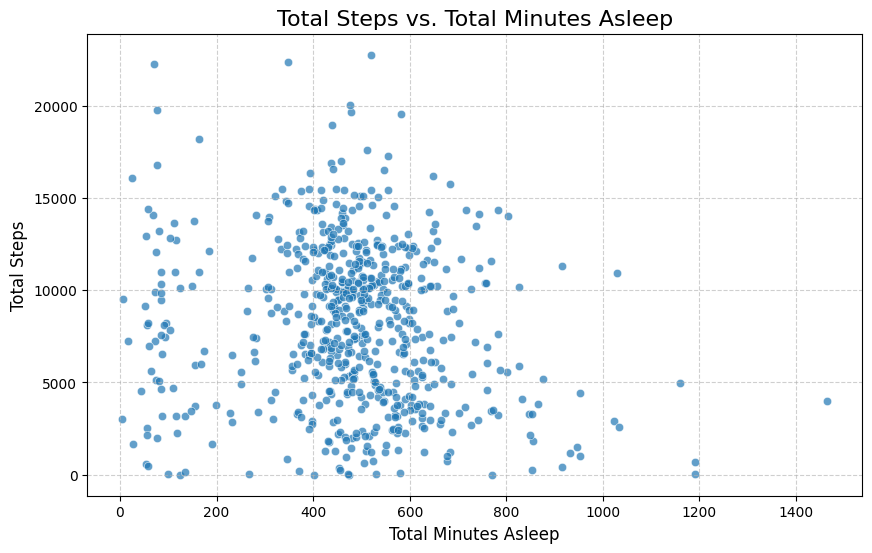

In [15]:
# Drop rows where we couldn't find sleep data for a cleaner plot
df_clean = df_merged.dropna(subset=['TotalMinutesAsleep'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean, 
    x="TotalMinutesAsleep", 
    y="TotalSteps", 
    palette="magma", 
    alpha=0.7
)
plt.title("Total Steps vs. Total Minutes Asleep", fontsize=16)
plt.xlabel("Total Minutes Asleep", fontsize=12)
plt.ylabel("Total Steps", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()